In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
X_train=pd.read_csv('X_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')
df_train=pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test, y_test], axis=1)

y_train_omf = y_train['Machine failure']
y_test_omf = y_test['Machine failure']

y_train_over_omf = pd.read_csv('y_oversample_train.csv')
X_train_over_omf = pd.read_csv('X_oversample_train.csv')
print("Oversampling done. Shape of oversampled training set:", X_train_over_omf.shape)
print("Oversampling done. Shape of oversampled training labels:", y_train_over_omf.shape)

Oversampling done. Shape of oversampled training set: (15444, 9)
Oversampling done. Shape of oversampled training labels: (15444, 1)


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def analyze_model_performance(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    y_train_omf = y_train['Machine failure']
    y_test_omf = y_test['Machine failure']
    clf.fit(X_train, y_train_omf)
    y_train_pred_omf = clf.predict(X_train)
    y_test_pred_omf = clf.predict(X_test)
    f2_train=fbeta_score(y_train_omf, y_train_pred_omf, beta=2, average='macro')
    f2_test=fbeta_score(y_test_omf, y_test_pred_omf, beta=2, average='macro')
    train_recall=recall_score(y_train_omf, y_train_pred_omf, average='macro')
    test_recall=recall_score(y_test_omf, y_test_pred_omf, average='macro')
    train_precision=precision_score(y_train_omf, y_train_pred_omf, average='macro', zero_division=0)
    test_precision=precision_score(y_test_omf, y_test_pred_omf, average='macro', zero_division=0)
    train_accuracy=accuracy_score(y_train_omf, y_train_pred_omf)
    test_accuracy=accuracy_score(y_test_omf, y_test_pred_omf)
    predictor_name = clf.__class__.__name__
    print(predictor_name)
    print(" For `Machine failure` label:")
    print("--------------------------------------------------")
    print("Train Data Metrics:")
    print(f"F2 Score on Training Data: {f2_train}")
    print(f"Recall on Training Data: {train_recall}")
    print(f"Precision on Training Data: {train_precision}")
    print(f"Accuracy on Training Data: {train_accuracy}")
    print("--------------------------------------------------")
    print("Test Data Metrics:")
    print(f"F2 Score on Test Data: {f2_test}")
    print(f"Recall on Test Data: {test_recall}")
    print(f"Precision on Test Data: {test_precision}")
    print(f"Accuracy on Test Data: {test_accuracy}")


    cm = confusion_matrix(y_train_omf, y_train_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {predictor_name} Predictor on Train Data')
    plt.show()

    cm = confusion_matrix(y_test_omf, y_test_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {predictor_name} Predictor on Test Data')
    plt.show()


## Logistic Regression On Imbalanced Data

LogisticRegression
 For `Machine failure` label:
--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 0.642806888238361
Recall on Training Data: 0.6260143400431171
Precision on Training Data: 0.8528830888961649
Accuracy on Training Data: 0.970875
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.6119487264330775
Recall on Test Data: 0.5981865284974094
Precision on Test Data: 0.8191847734546067
Accuracy on Test Data: 0.9685


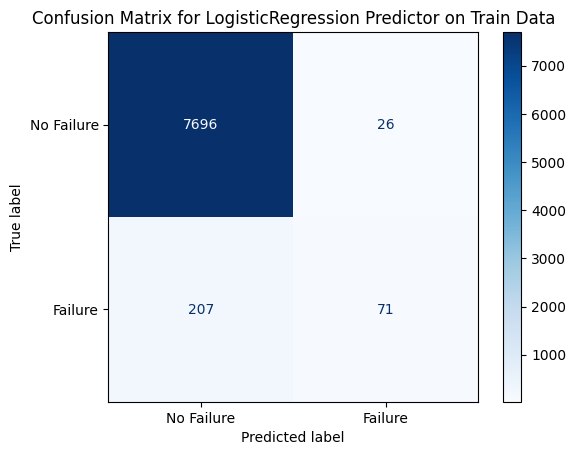

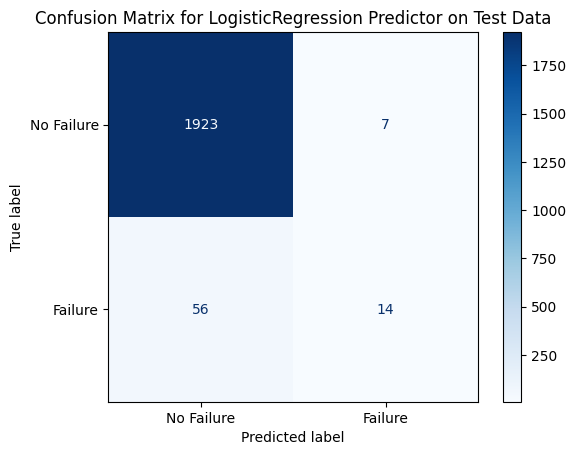

In [76]:
clr = LogisticRegression(max_iter=1000, random_state=42)
analyze_model_performance(clr, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

## Random Forest with Imbalanced Data

RandomForestClassifier
 For `Machine failure` label:
--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 1.0
Recall on Training Data: 1.0
Precision on Training Data: 1.0
Accuracy on Training Data: 1.0
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.9407343195310682
Recall on Test Data: 0.9346780162842339
Precision on Test Data: 0.9669051878354205
Accuracy on Test Data: 0.9935


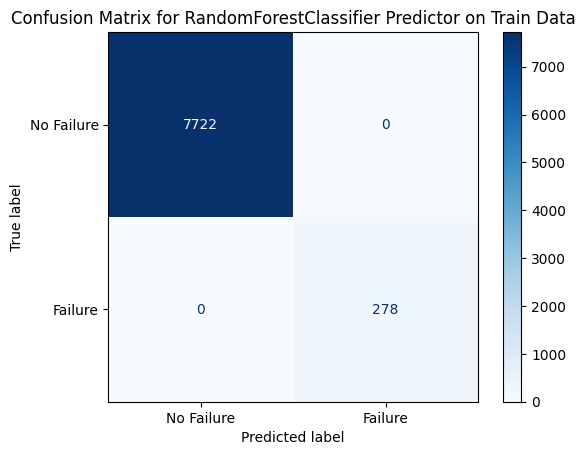

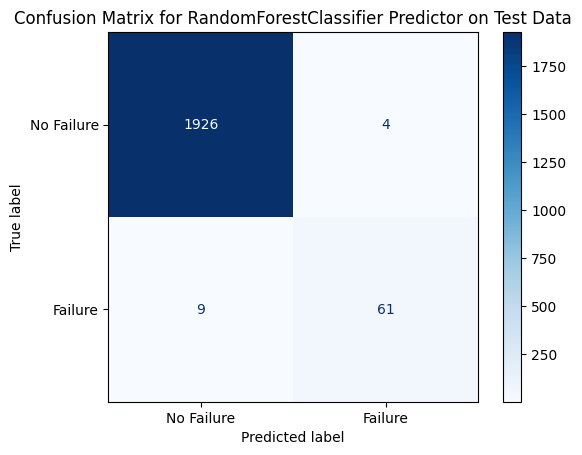

In [78]:
# Random Forest handles imbalance better than many algorithms
crf = RandomForestClassifier(random_state=42)
analyze_model_performance(crf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

## Logistic Regression on Balanced Data


LogisticRegression
 For `Machine failure` label:
--------------------------------------------------
Train Data Metrics:
F2 Score on Training Data: 0.8526746390243292
Recall on Training Data: 0.8526936026936027
Precision on Training Data: 0.8527951353116546
Accuracy on Training Data: 0.8526936026936027
--------------------------------------------------
Test Data Metrics:
F2 Score on Test Data: 0.6944771290708951
Recall on Test Data: 0.8838267949666914
Precision on Test Data: 0.5904041381402427
Accuracy on Test Data: 0.8555


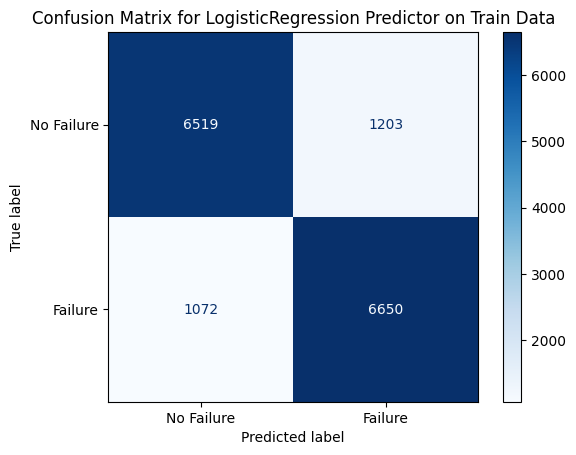

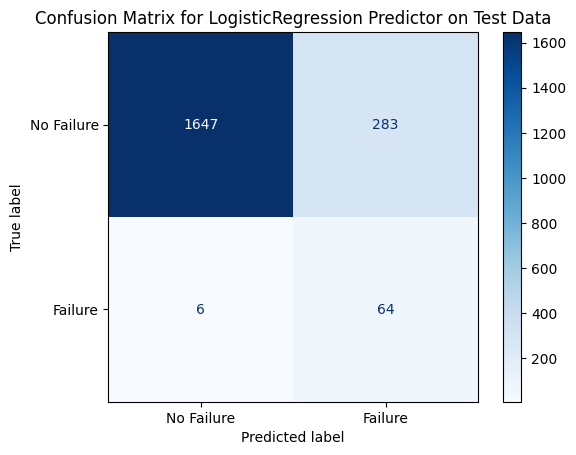

In [79]:
clr = LogisticRegression(max_iter=1000, random_state=42)
analyze_model_performance(clr, X_train=X_train_over_omf, y_train=y_train_over_omf, X_test=X_test, y_test=y_test)